In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
cols=df.columns
print(cols)
print(len(cols))


Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')
50


### Data Preprocessing

In [5]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [8]:
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
x = df.drop(columns=['target'])
y = df['target']

In [12]:
print(type(x))
print(x.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(937, 49)
<class 'pandas.core.series.Series'>
(937,)


In [13]:
Num_Transformar=Pipeline(steps=[('Imputer',SimpleImputer(strategy='mean'))])
preprocessor = ColumnTransformer(transformers=[('num',Num_Transformar)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer())]))])

In [14]:
x.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35


In [15]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int64

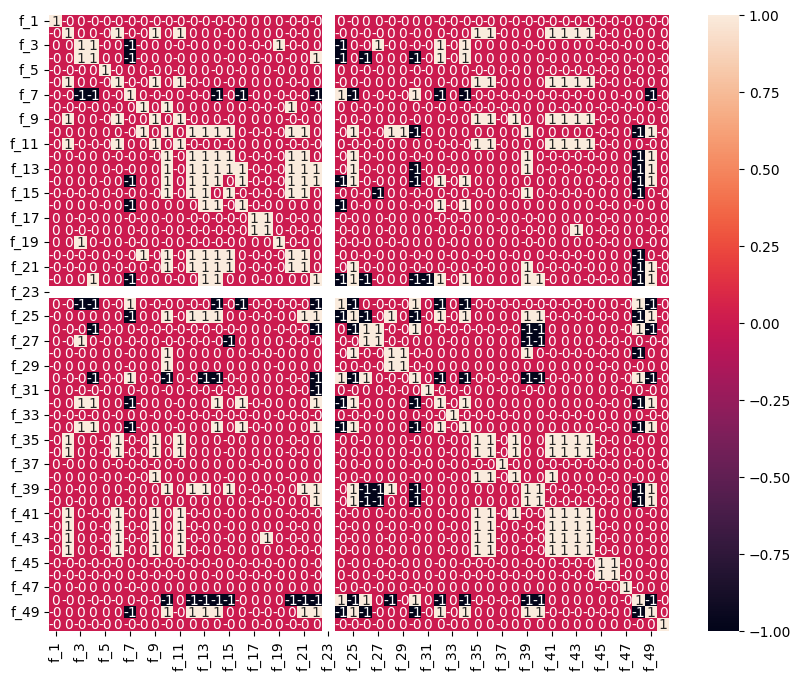

In [16]:
plt.figure(figsize=(10,8))
corr=df.corr().round()
sns.heatmap(data=corr,annot=True)
plt.show()

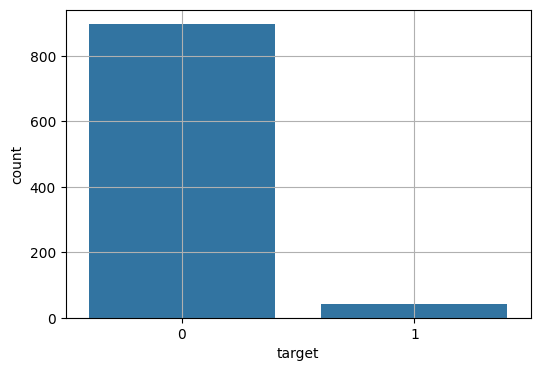

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.grid()
plt.show()

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(655, 49)
(282, 49)
(655,)
(282,)


### Creating Functions to compute Confusion matrix, Clasification Report and Training and Testing Score

In [20]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

### (A) Logistic Regrassion

#### 1) Importing Librarys

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
from sklearn.linear_model import LogisticRegression

#### 2) Building Model

In [23]:
log_reg = LogisticRegression(max_iter=1000,solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#### 3) Generate the predictions

In [24]:
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### 4) Evaluate the performance of Classifier

In [25]:
cls_eval(y_test,ypred_logreg)

[[266   5]
 [  3   8]]
Accuracy Score 0.9716312056737588
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       271
           1       0.62      0.73      0.67        11

    accuracy                           0.97       282
   macro avg       0.80      0.85      0.83       282
weighted avg       0.97      0.97      0.97       282



#### 5) Compute Training and Testing Score/Accuracy

In [26]:
mscore(log_reg)

Training Score 0.9694656488549618
Testing Score 0.9716312056737588


### (B)KNN Classification

#### 1) Importing Librarys

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#### 2) Building Model

In [28]:
KNN = KNeighborsClassifier(n_neighbors=32)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32)

#### 3) Generate the predictions

In [29]:
KNN.predict(x_test)[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### (C) Random Forest Model

#### 1) Importing Librarys

In [31]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 2) Building Model

In [33]:
ypred_rf = RandomForestClassifier(random_state=42)
ypred_rf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

#### 3) Generate the predictions

In [34]:
ypred_rf.predict(x_test)#[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 4) Evaluate the performance of Classifier

In [35]:
print('Random Forest Model Accuracy = ',accuracy_score(y_test,ypred_rf.predict(x_test)))

Random Forest Model Accuracy =  0.9645390070921985


In [ ]:
print(classification_report(y_test,ypred_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       271
           1       0.60      0.27      0.37        11

    accuracy                           0.96       282
   macro avg       0.79      0.63      0.68       282
weighted avg       0.96      0.96      0.96       282



### (D) Bagging Model

In [36]:
b_model = BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=10,random_state=42)
b_model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [37]:
b_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
print('Bagging Model Accuracy = ',accuracy_score(y_test,b_model.predict(x_test)))
print(classification_report(y_test,b_model.predict(x_test)))

Bagging Model Accuracy =  0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       271
           1       0.75      0.27      0.40        11

    accuracy                           0.97       282
   macro avg       0.86      0.63      0.69       282
weighted avg       0.96      0.97      0.96       282



## Q5) Save the best model and Load the mode

In [39]:
import joblib

In [40]:
sc=StandardScaler()

#### Saving Model

In [41]:
joblib.dump(b_model, 'Best_Model.pkl')

['Best_Model.pkl']

#### Loading Model

In [42]:
load_model=joblib.load('Best_Model.pkl')

## Q6) Take the original data set and make another dataset by randomly picking 20 data points from the oil spill dataset and applying the saved model to the same

### Assuming df is defind

In [43]:
random_indices = np.random.choice(df.index, size= 20, replace=False)
sample_data = df.loc[random_indices]
sc.fit(df.drop('target', axis=1))

StandardScaler()

#### Prediction using 20 sample Data

In [44]:
Scaled_sample = pd.DataFrame(
    sc.transform(sample_data.drop('target', axis=1)),
                 columns = sample_data.columns[:-1])
Sample_pred = load_model.predict(Scaled_sample)
print(Sample_pred)

[0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0]
